In [1]:
import catboost
import pandas as pd
import numpy as np
import os

## Load Dataset

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
nRowsRead = 1000 # specify 'None' if want to read whole file
# Womens Clothing E-Commerce Reviews.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'Womens Clothing E-Commerce Reviews.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv
There are 1000 rows and 11 columns


## Build Model

In [3]:
CAT_FEATURES=['Division Name','Department Name','Class Name']
TEXT_FEATURES=['Title', 'Review Text']
NUM_FEATURES=['Age']
X_COLUMNS = NUM_FEATURES + CAT_FEATURES + TEXT_FEATURES
Y_COLUMN = ['Rating']

df[CAT_FEATURES + TEXT_FEATURES] = df[CAT_FEATURES + TEXT_FEATURES].astype(str)


from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)



model = catboost.CatBoostRegressor(cat_features=CAT_FEATURES, 
                          text_features=TEXT_FEATURES,
                          iterations=1000,
                          early_stopping_rounds=100)

# Fit model
model.fit(df_train[X_COLUMNS], df_train[Y_COLUMN])

Learning rate set to 0.038699
0:	learn: 1.0843258	total: 221ms	remaining: 3m 40s
1:	learn: 1.0803222	total: 381ms	remaining: 3m 9s
2:	learn: 1.0759815	total: 535ms	remaining: 2m 57s
3:	learn: 1.0707835	total: 700ms	remaining: 2m 54s
4:	learn: 1.0653882	total: 857ms	remaining: 2m 50s
5:	learn: 1.0622774	total: 1.02s	remaining: 2m 48s
6:	learn: 1.0571852	total: 1.16s	remaining: 2m 44s
7:	learn: 1.0521062	total: 1.31s	remaining: 2m 42s
8:	learn: 1.0463924	total: 1.53s	remaining: 2m 48s
9:	learn: 1.0435244	total: 1.69s	remaining: 2m 47s
10:	learn: 1.0392243	total: 1.85s	remaining: 2m 46s
11:	learn: 1.0346914	total: 2s	remaining: 2m 45s
12:	learn: 1.0322143	total: 2.15s	remaining: 2m 43s
13:	learn: 1.0287271	total: 2.3s	remaining: 2m 42s
14:	learn: 1.0254097	total: 2.46s	remaining: 2m 41s
15:	learn: 1.0214410	total: 2.61s	remaining: 2m 40s
16:	learn: 1.0179562	total: 2.76s	remaining: 2m 39s
17:	learn: 1.0152772	total: 2.91s	remaining: 2m 38s
18:	learn: 1.0120904	total: 3.05s	remaining: 2m 3

In [4]:
model.score(df_test[X_COLUMNS], df_test[Y_COLUMN])

0.2854713235691765

## SHAPELY for categorical

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


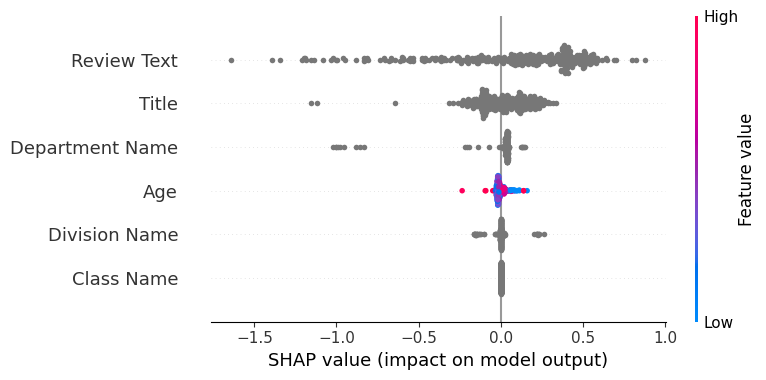

In [5]:
import shap
from catboost import *
shap.initjs()

X = df_test[X_COLUMNS]
y = df_test[Y_COLUMN]

pool = Pool(X, y, cat_features=CAT_FEATURES, text_features=TEXT_FEATURES)


explainer = shap.TreeExplainer(model)
shap_values = explainer(pool)

# summarize the effects of all the features
shap.summary_plot(shap_values, X)

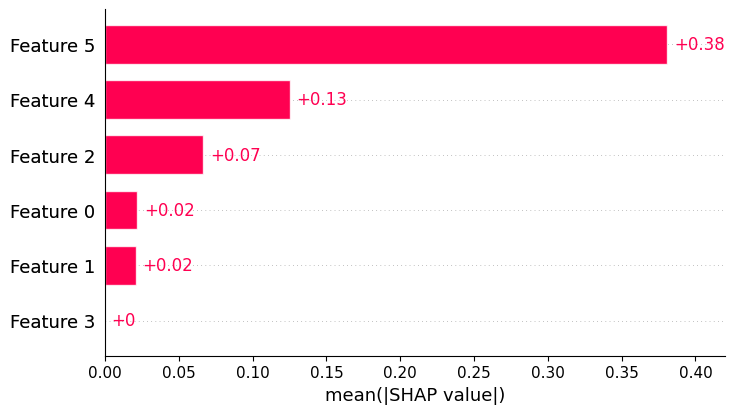

In [6]:
shap.plots.bar(shap_values)